In [27]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime

## Difference in Difference Idea

Let's see how we can use difference-in-differences can be applied to our podcast marketing problem. First, let's simulate the hours listened for 2 of my favorite podcasts: [Suburb Talks](https://www.youtube.com/@suburbtalks623) and [Under The Influence](https://www.youtube.com/@UnderTheInfluenceShow).

In [6]:
import numpy as np
import pandas as pd

# Parameters
total_users = 1000
base_rate = 0.1
marketing_effect = 0.05
max_listening_hours = 3

# Generate date range for March 2024
dates = pd.date_range(start='2024-03-01', end='2024-03-31')

# Initialize user data
users = pd.DataFrame({
    'user_id': range(1, total_users + 1),
    'group': ['Suburb Talks'] * (total_users // 2) + ['Under the Influence'] * (total_users // 2),
})

# Simulate daily listening hours
listening_data = []

for date in dates:
    for index, row in users.iterrows():
        user_id = row['user_id']
        group = row['group']
        
        # Determine probability of listening
        if group == 'Suburb Talks' and date.day > 15:
            listening_probability = base_rate + marketing_effect
        else:
            listening_probability = base_rate
        
        # Simulate whether the user listens and for how long
        listens = np.random.rand() < listening_probability
        listening_hours = np.random.randint(1, max_listening_hours + 1) if listens else 0
        
        listening_data.append({
            'user_id': user_id,
            'group': group,
            'date': date,
            'listening_hours': listening_hours
        })

# Create DataFrame from simulated data
listening_df = pd.DataFrame(listening_data)

# Summarize data
summary = listening_df.groupby(['group', 'date']).agg(total_listening_hours=('listening_hours', 'sum')).reset_index()


                  group       date  total_listening_hours
0          Suburb Talks 2024-03-01                    138
1          Suburb Talks 2024-03-02                    101
2          Suburb Talks 2024-03-03                     86
3          Suburb Talks 2024-03-04                    101
4          Suburb Talks 2024-03-05                    105
5          Suburb Talks 2024-03-06                     66
6          Suburb Talks 2024-03-07                    102
7          Suburb Talks 2024-03-08                     78
8          Suburb Talks 2024-03-09                    102
9          Suburb Talks 2024-03-10                     79
10         Suburb Talks 2024-03-11                     98
11         Suburb Talks 2024-03-12                    131
12         Suburb Talks 2024-03-13                    100
13         Suburb Talks 2024-03-14                     96
14         Suburb Talks 2024-03-15                    119
15         Suburb Talks 2024-03-16                    176
16         Sub

In [17]:
# Split Suburb Talks rows and Under the Influence rows
st = summary[summary['group'] == 'Suburb Talks'].copy()
uti = summary[summary['group'] == 'Under the Influence'].copy()

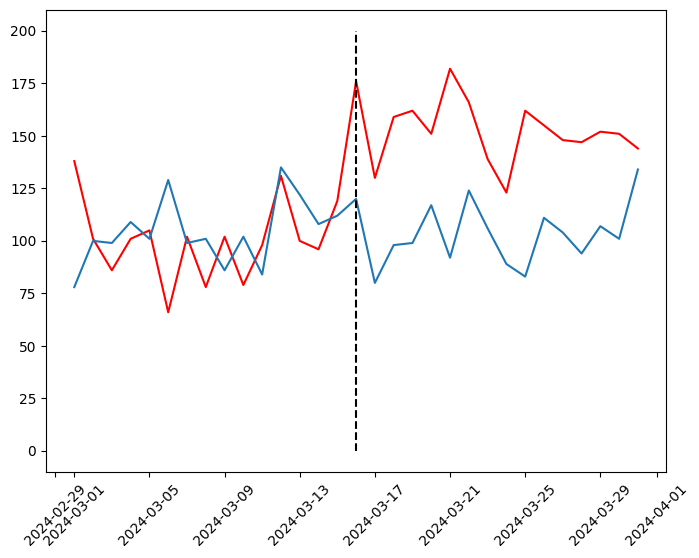

In [31]:
fig, ax = plt.subplots(figsize = (8, 6))
plt.plot(st['date'], st['total_listening_hours'], color = 'red');
plt.plot(uti['date'], uti['total_listening_hours']);
ax.vlines(pd.to_datetime('03-16-2024'), ymin=0, ymax=200, color = 'black', linestyles='--');
plt.xticks(rotation = 45);